In [1]:
##################################################################
#           《Python人工智能编程实践（2024年度版）》开源代码
#-----------------------------------------------------------------
#            @章节号：6.7.1（自动编码器的PyTorch实践）                                         
#            @作者：范淼、徐晟桐 
#            @购书链接：暂无
#            @电子邮箱：fm12@tsinghua.org.cn             
#            @官方交流QQ群号：561500762                        
##################################################################

In [2]:
from torch import nn, optim


#设定超参数。
INPUT_SIZE = 784 
HIDDEN_SIZE = 256
EPOCHS = 5
BATCH_SIZE = 64
LEARNING_RATE = 1e-3 


class AutoEncoder(nn.Module):
    '''
    自定义自动编码器类，继承自nn.Module。
    '''
    def __init__(self, input_size, hidden_size):
        
        super(AutoEncoder, self).__init__()
        
        self.l1 = nn.Linear(input_size, hidden_size) 
        
        self.relu = nn.ReLU()
        
        self.l2 = nn.Linear(hidden_size, input_size)  
        
        
    def forward(self, input_tensor):
        
        out = self.l1(input_tensor)
        
        out = self.relu(out)
        
        out = self.l2(out)
        
        return out 


#初始化自动编码器。
model = AutoEncoder(INPUT_SIZE, HIDDEN_SIZE)

#设定神经网络的损失函数。
criterion = nn.MSELoss()

#设定神经网络的优化方法。
optimizer = optim.Adam(model.parameters(), lr = LEARNING_RATE) 

In [3]:
import pandas as pd


#使用pandas，读取fashion_mnist的训练和测试数据文件。
train_data = pd.read_csv('../datasets/fashion_mnist/fashion_mnist_train.csv')
test_data = pd.read_csv('../datasets/fashion_mnist/fashion_mnist_test.csv')

#从训练数据中，拆解出训练特征和类别标签。
X_train = train_data[train_data.columns[1:]]

#从测试数据中，拆解出测试特征和类别标签。
X_test = test_data[train_data.columns[1:]]

In [4]:
from sklearn.preprocessing import StandardScaler


#初始化数据标准化处理器。
ss = StandardScaler()

#标准化训练数据特征。
X_train = ss.fit_transform(X_train)

#标准化测试数据特征。
X_test = ss.transform(X_test)

In [5]:
import torch
from torch.utils.data import TensorDataset, DataLoader


#构建适用于PyTorch模型训练的数据结构。
train_tensor = TensorDataset(torch.tensor(X_train.astype('float32')))

#构建适用于PyTorch模型训练的数据读取器。 
train_loader = DataLoader(dataset = train_tensor, batch_size = BATCH_SIZE, shuffle = True)

n_total_steps = len(train_loader)

#开启模型训练。
model.train()

for epoch in range(EPOCHS):
    for i, items in enumerate(train_loader):  
        outputs = model(items[0])
        loss = criterion(outputs, items[0])
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 300 == 0:
             print (f'Epoch [{epoch+1}/{EPOCHS}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}') 

Epoch [1/5], Step[300/938], Loss: 0.1619
Epoch [1/5], Step[600/938], Loss: 0.1373
Epoch [1/5], Step[900/938], Loss: 0.1125
Epoch [2/5], Step[300/938], Loss: 0.0840
Epoch [2/5], Step[600/938], Loss: 0.1153
Epoch [2/5], Step[900/938], Loss: 0.0804
Epoch [3/5], Step[300/938], Loss: 0.0904
Epoch [3/5], Step[600/938], Loss: 0.0836
Epoch [3/5], Step[900/938], Loss: 0.0760
Epoch [4/5], Step[300/938], Loss: 0.0781
Epoch [4/5], Step[600/938], Loss: 0.0836
Epoch [4/5], Step[900/938], Loss: 0.0645
Epoch [5/5], Step[300/938], Loss: 0.0839
Epoch [5/5], Step[600/938], Loss: 0.0556
Epoch [5/5], Step[900/938], Loss: 0.0741


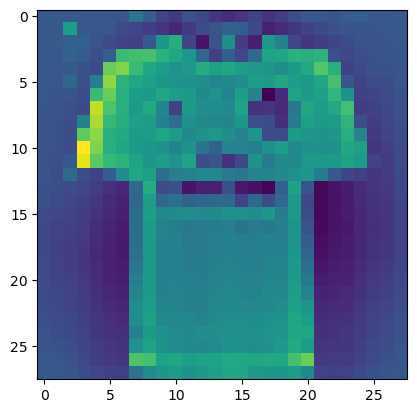

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100


#展示原始的图片。
test_sample = X_test[:1].reshape((28, 28))

plt.imshow(test_sample)

plt.show()

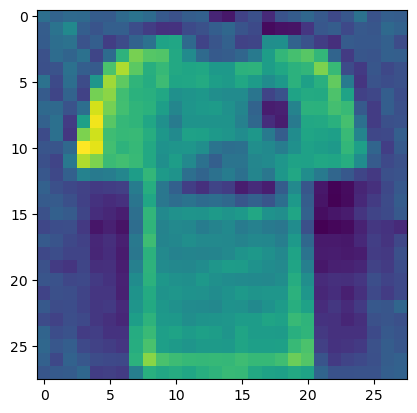

In [7]:
#开启模型测试。
model.eval()

reconstructed_features = model(torch.Tensor(X_test[:1].astype('float32')))

reconstructed_sample = reconstructed_features[0].detach().numpy().reshape((28,28))

#展示自编码重建的图片。
plt.imshow(reconstructed_sample)

plt.show()